# Estimando a relação entre a previsão de violência da máquina e a dos anotadores

[Voltar ao Índice](00_indice.ipynb)

Criando um estimador Bayesiano para uma relação linear entre o hate score produzido pela IA e a avaliação humana, para comparação do viés inter grupos sociais.

In [1]:
import matplotlib.pyplot as pl
import numpy as np

import src.analysis_functions as af

## Prior para os coeficientes lineares

### Visualizando o prior

/home/hxavier/ceweb/projetos/violentometro/analises/src/analysis_functions.py:1911: RuntimeWarning: invalid value encountered in log
  y = np.where(x <=0, 0, 1.0 / x / s / np.sqrt(2 * np.pi) * np.exp(-(np.log(x) - m)**2 / 2 / s**2))


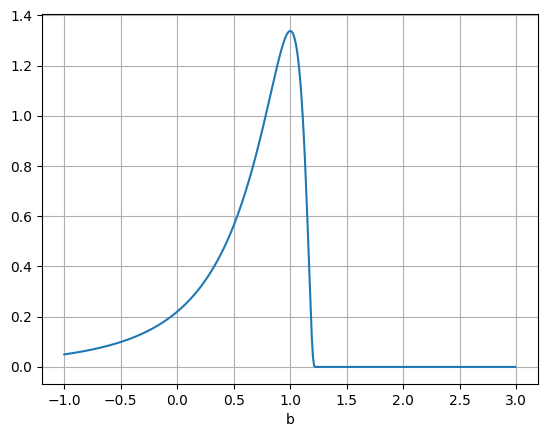

In [2]:
x = np.arange(-1, 3, 0.01)
pl.plot(x, af.shifted_lognormal(-x, -0.7, 0.9, -1))
pl.xlabel('b')
pl.grid()
pl.show()

In [3]:
# Create meshgrid
amin = -0.2
amax = 1.2
bmin = -1.2
bmax = 1.2
aa, bb = np.mgrid[amin:amax:0.01, bmin:bmax:0.01]
z = af.hate_score_bias_prior(aa, bb)

/home/hxavier/ceweb/projetos/violentometro/analises/src/analysis_functions.py:1905: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(x - m)**2 / 2 / s**2)
/home/hxavier/ceweb/projetos/violentometro/analises/src/analysis_functions.py:1905: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(x - m)**2 / 2 / s**2)


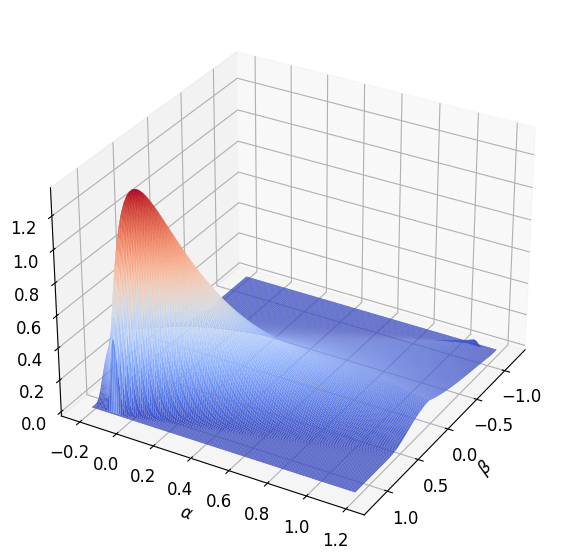

In [22]:
fig = pl.figure(figsize=(7, 7))

ax = pl.subplot(1,1,1, projection='3d')
surf = ax.plot_surface(bb, aa, z, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_ylabel(r'$\alpha$', fontsize=12)
ax.tick_params(labelsize=12)
ax.view_init(30, 30)
#pl.savefig('../resultados/plots/plot-prior-hate-score-3d.svg', bbox_inches='tight')
#pl.savefig('../resultados/plots/plot-prior-hate-score-3d.png', bbox_inches='tight')
pl.show()

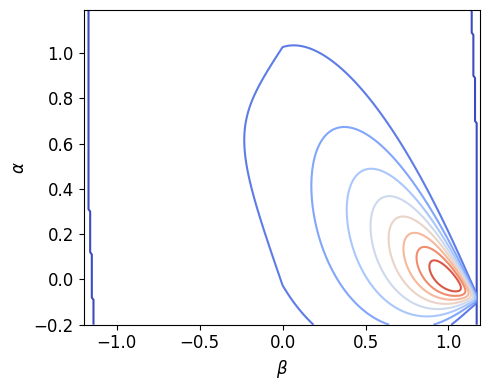

In [31]:
fig = pl.figure(figsize=(5, 4))

pl.contour(bb, aa, z, cmap='coolwarm', levels=10)
pl.xlabel(r'$\beta$', fontsize=12)
pl.ylabel(r'$\alpha$', fontsize=12)
pl.tick_params(labelsize=12)
pl.tight_layout()
#pl.savefig('../resultados/plots/plot-prior-hate-score-contour.svg', bbox_inches='tight')
#pl.savefig('../resultados/plots/plot-prior-hate-score-contour.png', bbox_inches='tight')
pl.show()